# Multi-fluid modeling of a sheath in a weakly-ionized collisionless plasma with the energy equation

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visible click here"></form>''')

We present the solutions of a weakly-ionized collisionless plasma between two floating plates. The set of equations that are solved are as follow

$$\partial_t n_e + \partial_x \left( n_e u_e \right) = n_e \text{Da} $$
$$\partial_t n_i + \partial_x \left( n_i u_i \right) = n_e \text{Da} $$
$$\partial_t \left(n_eu_e\right) + \partial_x \left( n_e u_e^2 + p_e\epsilon^{-1}\right) = \frac{n_e}{\epsilon}\partial_x\phi - \nu_e n_e u_e $$
$$\partial_t \left(n_iu_i\right) + \partial_x \left( n_i u_i^2 + p_i\right) = -n_i\partial_x\phi - \nu_i n_i u_i $$
$$\partial_t \left(n_e\mathcal{E}_e\right) + \partial_x \left( n_e \mathcal{H}_eu_e\right) = \frac{n_eu_e}{\epsilon}\partial_x\phi - \nu_e n_eu_e^2 + P_{abs} - P_{loss}$$
$$\partial_t \left(n_i\mathcal{E}_i\right) + \partial_x \left( n_i \mathcal{H}_iu_i\right) = -  n_iu_i\partial_x\phi - \nu_i n_iu_i^2$$
$$\lambda^2\partial^2_{xx}\phi = n_e - n_i $$

where $p_e = n_eT_e$, $p_i = n_iT_i$, $\mathcal{E}_e = u^2_e/2 + 3/2T_e/\epsilon$, $\mathcal{H}_e = u^2_e/2 + 5/2T_e/\epsilon$, $\mathcal{E}_i = u^2_i/2 + 3/2T_i$, and $\mathcal{H}_i = u^2_i/2 + 5/2T_i$.

The ionization is computed as

$$\text{Da} = n_nK_{iz}\exp(-\varepsilon_{iz}/T_e)/t_0$$

The power losses are computed as

$$P_{loss} = n_en_nK_{iz}\exp(-\varepsilon_{iz}/T_e)\varepsilon_{iz}$$

The power absorbed is computed as a constant value in space that changes in time

$$P_{abs} = P^{(0)}_{abs}[1 - \exp(-t/\tau)]$$

The numerical scheme features:

 - TVD second order reconstruction
 - third order
 - TVD RK 3
 - Roe scheme
 - Thomas algorithm

The simulation allows for choosing for the following degrees of freedom

 - $\epsilon$
 - $\kappa$
 - $\nu_e$
 - $\nu_i$
 - $\lambda_D/L$
 - $ P_{abs} $ and $\tau$
 - $ \varepsilon_{iz}/T_e$ and $n_nK_{iz}$

## Case Study 1: Constant absorbed power

We study the following conditions:

$$\epsilon^{-1} = 73451.7~~ \text{(Ar)}$$
$$T_i/T_e = 0.025$$
$$\nu_e = 1./1.7618751920$$
$$\nu_i = 1./301.999459159$$
$$L/\lambda_D = 285$$
$$ \varepsilon_{iz}/T_e = 8.72  \text{and} n_nK_{iz} = 0.299 

- Limiter: third order
- Reconstruction : Second order
- Results directory: Results_Energy_3rdOrder_TVDRK3_Realistic_2

See next cell for input parameters


In [9]:
nbCells = 500
InitialField = [0 for i in range(4*nbCells)]
# Set Density of Electrons
for iCell in range(nbCells):
       InitialField[0*nbCells + iCell] = 1.
# Set Momentum of Electrons
for iCell in range(nbCells):
       InitialField[1*nbCells + iCell] = 0.
# Set Density of Ions
for iCell in range(nbCells):
       InitialField[2*nbCells + iCell] = 1.
# Set Momentum of Ions
for iCell in range(nbCells):
       InitialField[3*nbCells + iCell] = 0.

# Set Mesh
mesh = [0 for i in range(nbCells)]
for iCell in range(nbCells):
       length   = 50.
       delta_X = length/nbCells
       mesh[iCell] = delta_X/2. + iCell*delta_X

options = {
        'nbEqs':4,
        'nbFluids':2,
        'nbCells':nbCells,
        'geometry':"1D",
        'mesh':mesh,
        'stopCondition':{'type':"nbSteps",'value':9e6},
        #'stopCondition':{'type':"Residual",'value':-12},
        'Inlet':{'type':"TwoFluidIsothermalSheath",},
        'Outlet':{'type':"TwoFluidIsothermalSheath",},
        'PhysicalModel':{
                'type':"MultiFluidIsothermal1D",
                'soundSpeed': [np.sqrt(73451.7), np.sqrt(0.025)],
                },
        'SourceTerm':{
                'type':"TwoFluidIsothermal1D",
                'massRatio':73451.7,
                'DebyeLength':1.,
                'ionizConst':1.,
                'epsIoniz':8.72,
                'CollIons':0.,
                'CollElectrons':100./1.76187519204,
                'PhiIn':0.,
                'PhiOut':0.,
                },
        'CFL':0.1,
        'saveRate':10000,
        'resultDir':"./Results_Isothermal_2ndOrder",
        'limiter':"ospre",
        'reconstruction':"TVD2ndOrder1D",#"TVD2ndOrder1D",1stOrder"
        'fluxScheme':"RoeMultiFluidIsothermal1D",#"LaxFriedrich",
        'initialField':InitialField,
}

Press Shift+enter to read results

In [1]:
import sys  
import os
import numpy as np
# IMPORT PATH TO PYTHONTOOLS MODULE
sys.path.append('./PythonTools') 

import plotResults
import tkinter as tk
from tkinter import filedialog

%gui tk

root = tk.Tk()
root.withdraw()

currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.quit()
print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))

# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)



Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/1_ProceduralCode/EulerIsothermalProcedural/EulerIsothermalProcedural/Results_Energy_3rdOrder_TVDRK3_Realistic_2/file_iter_10969000.txt
NbEqs =  7
NbCells =  2850


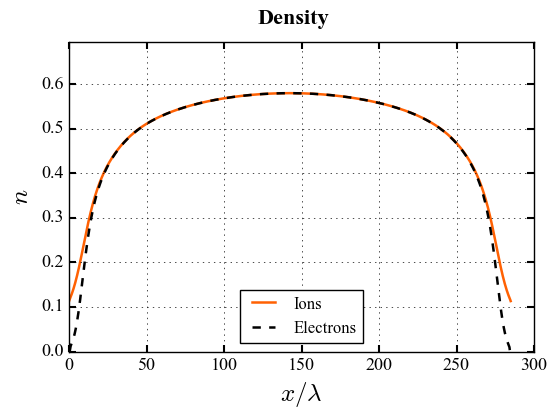

In [2]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
n_e = plotData.resultsArray[1]
n_i = plotData.resultsArray[4]

massRatio = 73451.7;


ax.plot(x, n_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, n_e*massRatio, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$n$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(n_e*massRatio)
ymax = max(n_e*massRatio)
ax.set_ylim([0,1.2*ymax])
ax.grid(True)
plt.show()


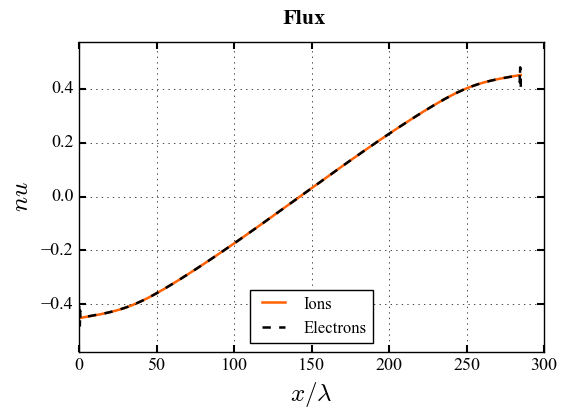

In [3]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
nU_e = plotData.resultsArray[2]
nU_i = plotData.resultsArray[5]

ax.plot(x, nU_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, nU_e*massRatio, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$nu$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Flux', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(nU_e*massRatio)
ymax = max(nU_e*massRatio)
ax.set_ylim([1.2*ymin,1.2*ymax])
ax.grid(True)
plt.show()



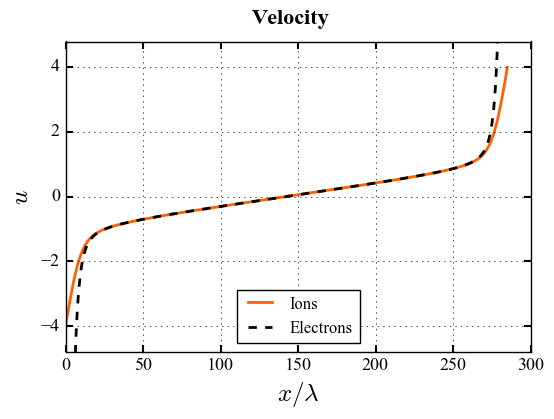

In [4]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
U_e = nU_e[:]/n_e[:]
U_i = nU_i[:]/n_i[:]

ax.plot(x, U_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, U_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$u$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Velocity', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(U_i)
ymax = max(U_i)
ax.set_ylim([1.2*ymin,1.2*ymax])
ax.grid(True)
plt.show()

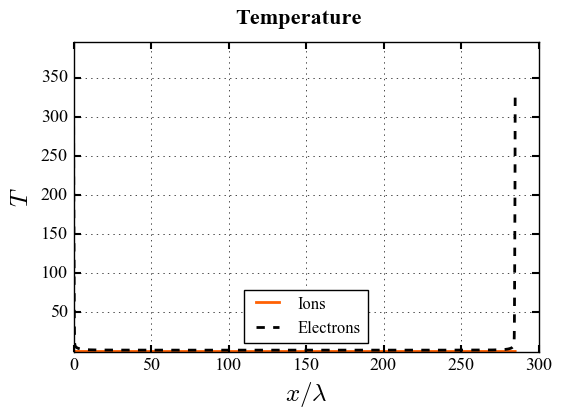

In [5]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
rhoE_e = plotData.resultsArray[3]
rhoE_i = plotData.resultsArray[6]
T_e = 2./3.*(rhoE_e[:] - 0.5*n_e[:]*U_e[:]*U_e[:])/(n_e[:]*massRatio)
T_i = 2./3.*(rhoE_i[:] - 0.5*n_i[:]*U_i[:]*U_i[:])/n_i[:]

ax.plot(x, T_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, T_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$T$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Temperature', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(T_i)
ymax = max(T_e)
ax.set_ylim([0.8*ymin,1.2*ymax])
ax.grid(True)
plt.show()

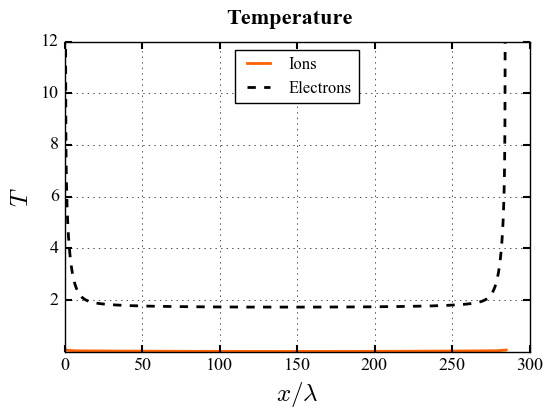

In [6]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
rhoE_e = plotData.resultsArray[3]
rhoE_i = plotData.resultsArray[6]
T_e = 2./3.*(rhoE_e[:] - 0.5*n_e[:]*U_e[:]*U_e[:])/(n_e[:]*massRatio)
T_i = 2./3.*(rhoE_i[:] - 0.5*n_i[:]*U_i[:]*U_i[:])/n_i[:]

ax.plot(x, T_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, T_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$T$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'upper center', fontsize = 12)

f.suptitle('Temperature', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(T_i)
ymax = 10
ax.set_ylim([0.8*ymin,1.2*ymax])
ax.grid(True)
plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


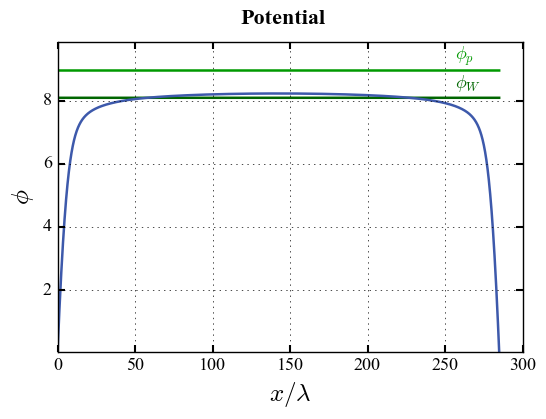

In [7]:
plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
phi = plotData.resultsArray[7]

MASSRATIO = 73451.7;
nbCells_half = np.around(plotData.nbCells/2)
T_eCenter    = T_e[nbCells_half]
phi_W    = np.log((MASSRATIO/(2*np.pi))**(1/2))*np.ones(x.size)*T_eCenter;
phi_P    = (phi_W + 0.5*T_eCenter)*np.ones(x.size);

ax.plot(x, phi_W, color=(0, 0.4, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi_P, color=(0, 0.6, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi, color=(61/255,89/255,171/255), linewidth=1.8, markersize=3, label ='Potential')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\phi$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
#plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Potential', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

plt.text(0.9*max(x),1.04*max(phi_W),r'$\phi_W$',fontsize=13,color=(0, 0.4, 0), weight = 'bold')
plt.text(0.9*max(x),1.04*max(phi_P),r'$\phi_p$',fontsize=13,color=(0, 0.6, 0), weight = 'bold')

ymin = min(phi)
ymax = max(phi)
ax.set_ylim([ymin,1.2*ymax])
ax.grid(True)
plt.show()




## Case Study 2: Absorbed power that is proportional to the electron density

We study the following conditions:

$$\epsilon^{-1} = 73451.7~~ \text{(Ar)}$$
$$T_i/T_e = 0.025$$
$$\nu_e = 1./1.7618751920$$
$$\nu_i = 1./301.999459159$$
$$L/\lambda_D = 285$$
$$ \varepsilon_{iz}/T_e = 8.72  \text{and} n_nK_{iz} = 0.299 

- Limiter: third order
- Reconstruction : Second order
- Results directory: Results_Energy_3rdOrder_TVDRK3_Realistic_2

See next cell for input parameters

- Limiter: osper
- Reconstruction : Second order
- Results directory: Results_Isothermal_2ndOrderNominal

See next cell for input parameters


In [9]:
nbCells = 500
InitialField = [0 for i in range(4*nbCells)]
# Set Density of Electrons
for iCell in range(nbCells):
       InitialField[0*nbCells + iCell] = 1.
# Set Momentum of Electrons
for iCell in range(nbCells):
       InitialField[1*nbCells + iCell] = 0.
# Set Density of Ions
for iCell in range(nbCells):
       InitialField[2*nbCells + iCell] = 1.
# Set Momentum of Ions
for iCell in range(nbCells):
       InitialField[3*nbCells + iCell] = 0.

# Set Mesh
mesh = [0 for i in range(nbCells)]
for iCell in range(nbCells):
       length   = 50.
       delta_X = length/nbCells
       mesh[iCell] = delta_X/2. + iCell*delta_X

options = {
        'nbEqs':4,
        'nbFluids':2,
        'nbCells':nbCells,
        'geometry':"1D",
        'mesh':mesh,
        'stopCondition':{'type':"nbSteps",'value':9e6},
        #'stopCondition':{'type':"Residual",'value':-12},
        'Inlet':{'type':"TwoFluidIsothermalSheath",},
        'Outlet':{'type':"TwoFluidIsothermalSheath",},
        'PhysicalModel':{
                'type':"MultiFluidIsothermal1D",
                'soundSpeed': [np.sqrt(73451.7), np.sqrt(0.025)],
                },
        'SourceTerm':{
                'type':"TwoFluidIsothermal1D",
                'massRatio':73451.7,
                'DebyeLength':1.,
                'ionizConst':1.,
                'epsIoniz':8.72,
                'CollIons':0.,
                'CollElectrons':100./1.76187519204,
                'PhiIn':0.,
                'PhiOut':0.,
                },
        'CFL':0.1,
        'saveRate':10000,
        'resultDir':"./Results_Isothermal_2ndOrder",
        'limiter':"ospre",
        'reconstruction':"TVD2ndOrder1D",#"TVD2ndOrder1D",1stOrder"
        'fluxScheme':"RoeMultiFluidIsothermal1D",#"LaxFriedrich",
        'initialField':InitialField,
}

Press Shift+enter to read results

In [9]:
import sys  
import os
import numpy as np
# IMPORT PATH TO PYTHONTOOLS MODULE
sys.path.append('./PythonTools') 

import plotResults
import tkinter as tk
from tkinter import filedialog

%gui tk

root = tk.Tk()
root.withdraw()

currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.quit()
print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))

# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)



Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/1_ProceduralCode/EulerIsothermalProcedural/EulerIsothermalProcedural/Results_Energy_3rdOrder_TVDRK3_Realistic_OpenBoundary_PowerAbsorbedProp/file_iter_4500000.txt
NbEqs =  7
NbCells =  2850


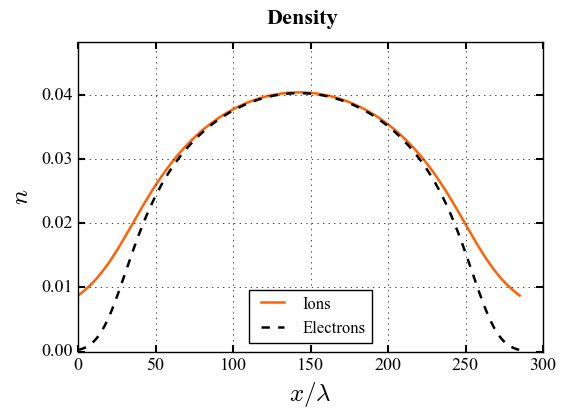

In [10]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
n_e = plotData.resultsArray[1]
n_i = plotData.resultsArray[4]

massRatio = 73451.7;


ax.plot(x, n_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, n_e*massRatio, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$n$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(n_e*massRatio)
ymax = max(n_e*massRatio)
ax.set_ylim([0,1.2*ymax])
ax.grid(True)
plt.show()


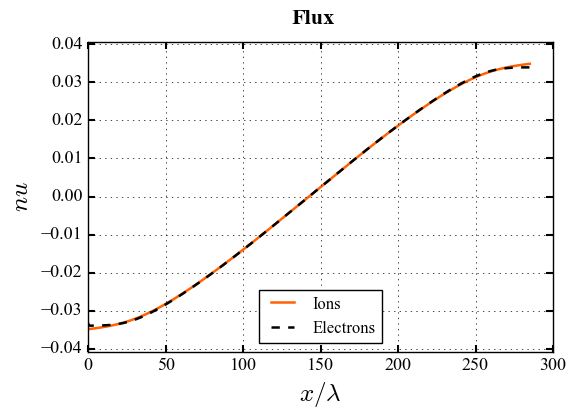

In [11]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
nU_e = plotData.resultsArray[2]
nU_i = plotData.resultsArray[5]

ax.plot(x, nU_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, nU_e*massRatio, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$nu$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Flux', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(nU_e*massRatio)
ymax = max(nU_e*massRatio)
ax.set_ylim([1.2*ymin,1.2*ymax])
ax.grid(True)
plt.show()



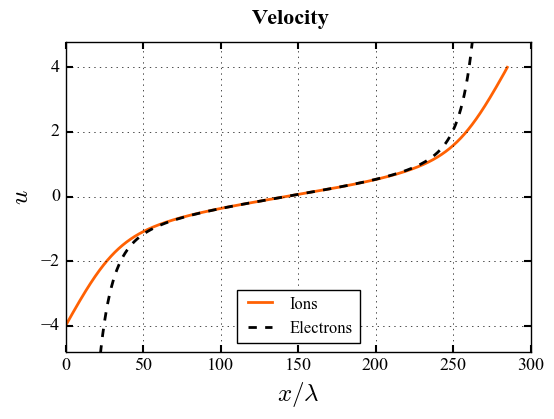

In [12]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
U_e = nU_e[:]/n_e[:]
U_i = nU_i[:]/n_i[:]

ax.plot(x, U_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, U_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$u$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Velocity', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(U_i)
ymax = max(U_i)
ax.set_ylim([1.2*ymin,1.2*ymax])
ax.grid(True)
plt.show()

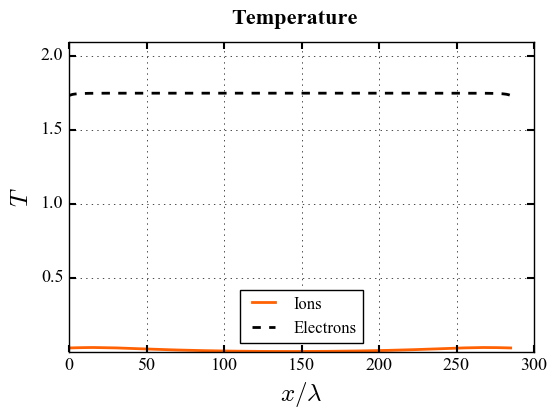

In [13]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
rhoE_e = plotData.resultsArray[3]
rhoE_i = plotData.resultsArray[6]
T_e = 2./3.*(rhoE_e[:] - 0.5*n_e[:]*U_e[:]*U_e[:])/(n_e[:]*massRatio)
T_i = 2./3.*(rhoE_i[:] - 0.5*n_i[:]*U_i[:]*U_i[:])/n_i[:]

ax.plot(x, T_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, T_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$T$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Temperature', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(T_i)
ymax = max(T_e)
ax.set_ylim([0.8*ymin,1.2*ymax])
ax.grid(True)
plt.show()

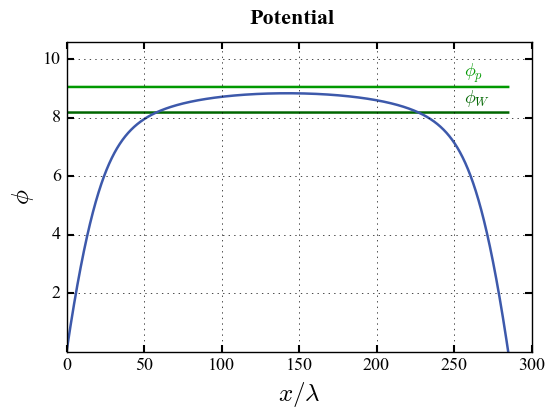

In [14]:
plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
phi = plotData.resultsArray[7]

MASSRATIO = 73451.7;
phi_W    = np.log((MASSRATIO/(2*np.pi))**(1/2))*np.ones(x.size)*np.average(T_e);
phi_P    = (phi_W + 0.5*np.average(T_e))*np.ones(x.size);

ax.plot(x, phi_W, color=(0, 0.4, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi_P, color=(0, 0.6, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi, color=(61/255,89/255,171/255), linewidth=1.8, markersize=3, label ='Potential')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\phi$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
#plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Potential', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

plt.text(0.9*max(x),1.04*max(phi_W),r'$\phi_W$',fontsize=13,color=(0, 0.4, 0), weight = 'bold')
plt.text(0.9*max(x),1.04*max(phi_P),r'$\phi_p$',fontsize=13,color=(0, 0.6, 0), weight = 'bold')

ymin = min(phi)
ymax = max(phi)
ax.set_ylim([ymin,1.2*ymax])
ax.grid(True)
plt.show()


